
### Restaurant Data Analysis
#### Level 1 
#### Task 1 Data Exploration and Preprocessing



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\Downloads\Dataset .csv")

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 9551
Number of columns: 21


In [5]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# Handle missing values using mode imputation for 'Cuisines' column
mode_cuisines = data['Cuisines'].mode()[0]
data['Cuisines'].fillna(mode_cuisines, inplace=True)

In [8]:
## checking for duplicates
data.duplicated().sum()

0

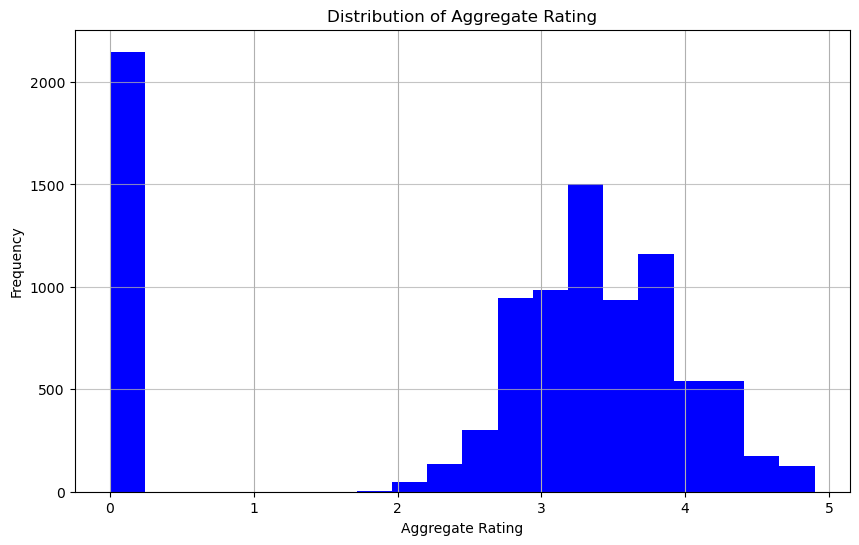

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
data['Aggregate rating'].hist(bins=20, color='blue')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [10]:
rating_distribution = data['Aggregate rating'].value_counts(normalize=True)
print("\nDistribution of Aggregate rating:")
print(rating_distribution)



Distribution of Aggregate rating:
Aggregate rating
0.0    0.224898
3.2    0.054654
3.1    0.054340
3.4    0.052141
3.3    0.050571
3.5    0.050257
3.0    0.049000
3.6    0.047953
3.7    0.044707
3.8    0.041880
2.9    0.039891
3.9    0.035075
2.8    0.032981
4.1    0.028688
4.0    0.027850
2.7    0.026175
4.2    0.023139
2.6    0.019998
4.3    0.018218
4.4    0.015077
2.5    0.011517
4.5    0.009947
2.4    0.009109
4.6    0.008167
4.9    0.006387
2.3    0.004921
4.7    0.004397
2.2    0.002827
4.8    0.002618
2.1    0.001571
2.0    0.000733
1.9    0.000209
1.8    0.000105
Name: proportion, dtype: float64


### Level 1 
### Task 2 Descriptive Analysis


In [11]:
## Seperating the numerocal and categorical features
numerical_features = data.select_dtypes(exclude = 'object')
categorical_features = data.select_dtypes(include = 'object')
print("numerical_features: ",numerical_features)
print("categorical_features: ",categorical_features)

numerical_features:        Restaurant ID  Country Code   Longitude   Latitude  \
0           6317637           162  121.027535  14.565443   
1           6304287           162  121.014101  14.553708   
2           6300002           162  121.056831  14.581404   
3           6318506           162  121.056475  14.585318   
4           6314302           162  121.057508  14.584450   
...             ...           ...         ...        ...   
9546        5915730           208   28.977392  41.022793   
9547        5908749           208   29.041297  41.009847   
9548        5915807           208   29.034640  41.055817   
9549        5916112           208   29.036019  41.057979   
9550        5927402           208   29.026016  40.984776   

      Average Cost for two  Price range  Aggregate rating  Votes  
0                     1100            3               4.8    314  
1                     1200            3               4.5    591  
2                     4000            4               4.4

In [12]:
## calculating basic statistics
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [13]:
# Explore the distribution of categorical variables: "Country Code," "City," and "Cuisines"
categorical_variables = data[['Country Code', 'City', 'Cuisines']].apply(pd.Series.value_counts)
print("\nDistribution of Categorical Variables:")
print(categorical_variables)



Distribution of Categorical Variables:
                                                    Country Code  City  \
1                                                         8652.0   NaN   
14                                                          24.0   NaN   
30                                                          60.0   NaN   
37                                                           4.0   NaN   
94                                                          21.0   NaN   
...                                                          ...   ...   
Bengali, Fast Food                                           NaN   NaN   
North Indian, Rajasthani, Asian                              NaN   NaN   
Chinese, Thai, Malaysian, Indonesian                         NaN   NaN   
Bakery, Desserts, North Indian, Bengali, South ...           NaN   NaN   
Italian, World Cuisine                                       NaN   NaN   

                                                    Cuisines  
1       

In [14]:
## Identify top cuisines
top_cuisines = data['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(10)
print("\nTop 10 Cuisines:")
print(top_cuisines)



Top 10 Cuisines:
North Indian    3969
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


In [15]:
# identifying the top cities with highest number of restaurants
top_cities = data['City'].value_counts().head(10)
print("\nTop 10 Cities with Highest Number of Restaurants:")
print(top_cities)


Top 10 Cities with Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


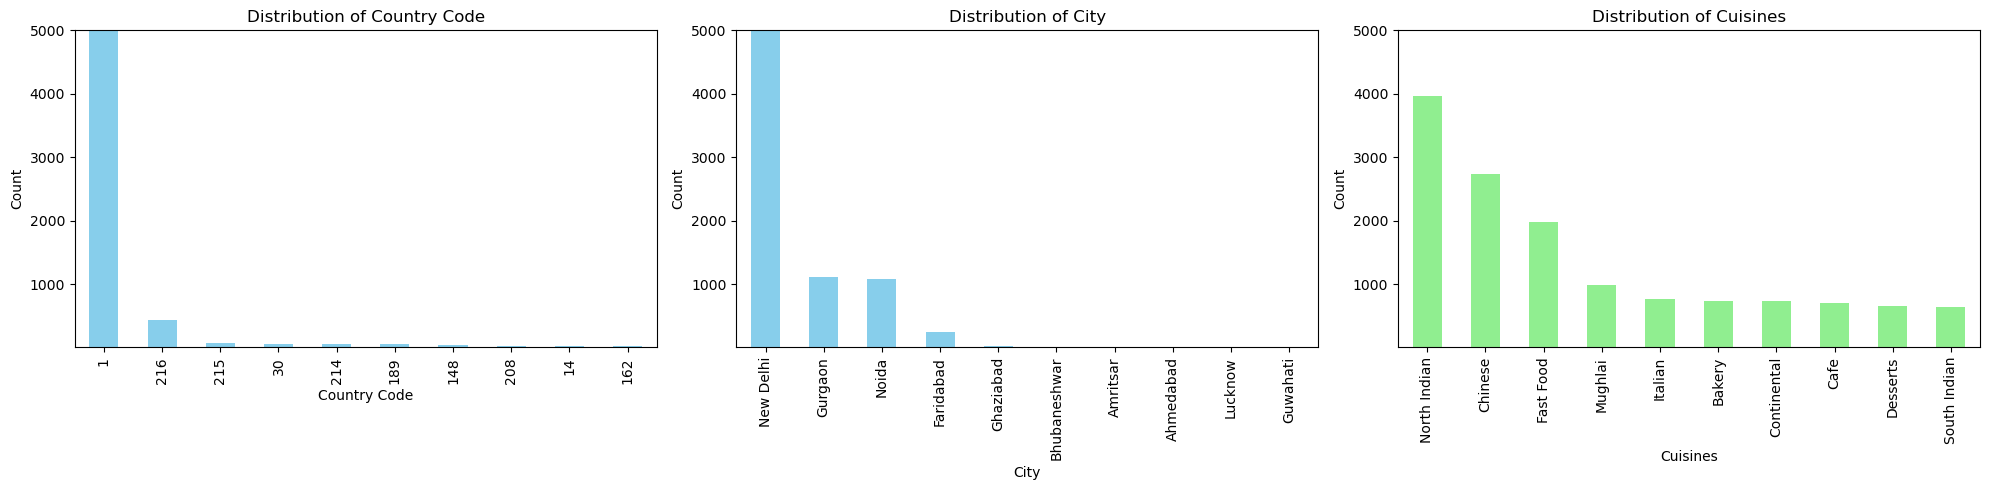

In [16]:
import matplotlib.pyplot as plt

# Define the categorical variables
categorical_variables = ['Country Code', 'City', 'Cuisines']

# Set the figure size
plt.figure(figsize=(20,5))

# Iterate over each categorical variable
for i, variable in enumerate(categorical_variables, 1):
    # Create a subplot for each variable
    plt.subplot(1, len(categorical_variables), i)
    
    # Plot the distribution of the variable
    if variable == 'Cuisines':
        # For 'Cuisines', we use the top_cuisines variable we calculated earlier
        top_cuisines.plot(kind='bar', color='lightgreen')
    else:
        data[variable].value_counts().head(10).plot(kind='bar', color='skyblue')
    
    # Add title and labels
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    
    # Manually set the y-axis limits to decrease the difference between ticks
    plt.ylim(10, 5000) 

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


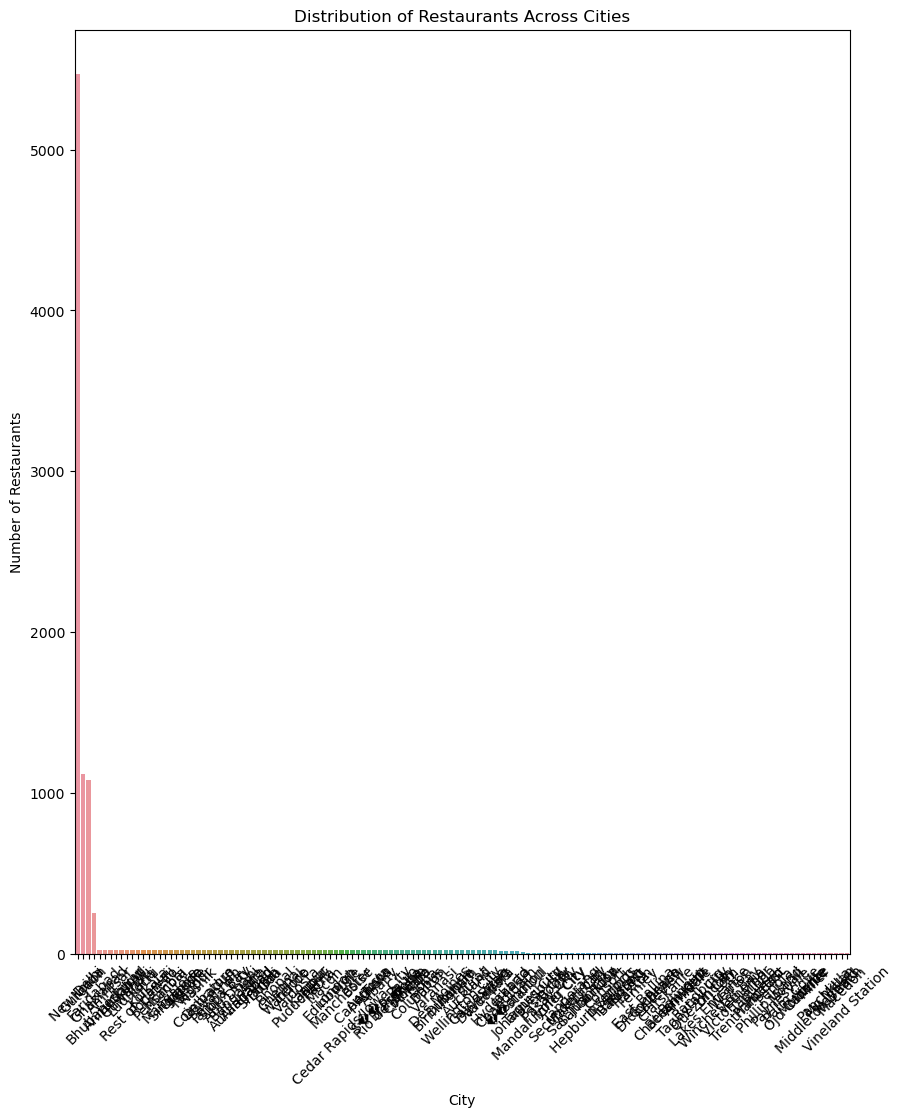

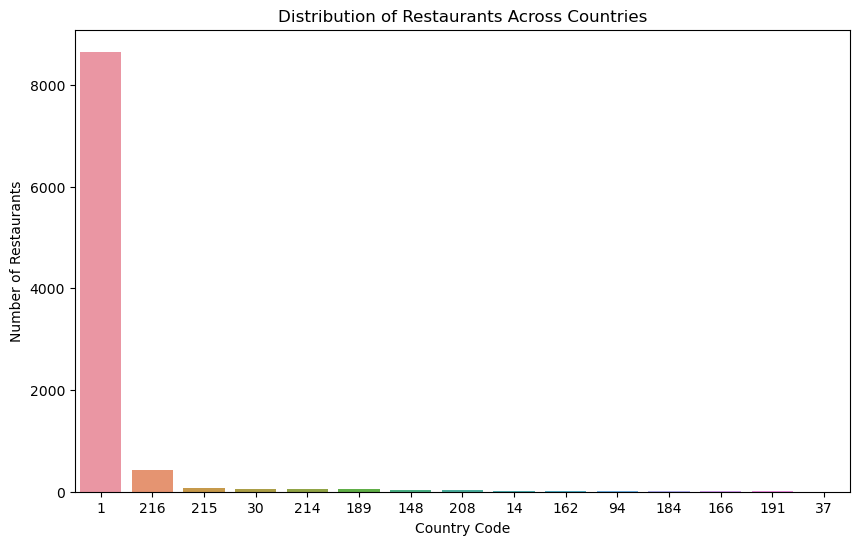

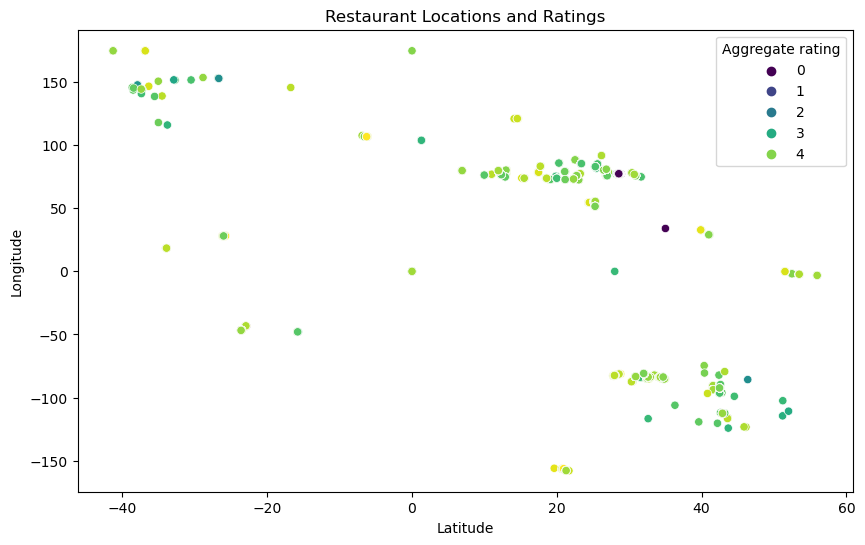

In [17]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the locations of restaurants on a map using latitude and longitude information
map_restaurants = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

for index, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map_restaurants)

# Save the map to an HTML file
map_restaurants.save("restaurant_locations_map.html")

# Analyze the distribution of restaurants across different cities or countries
plt.figure(figsize=(10, 12))
sns.countplot(x='City', data=data, order=data['City'].value_counts().index)
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Country Code', data=data, order=data['Country Code'].value_counts().index)
plt.title('Distribution of Restaurants Across Countries')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()

# Determine if there is any correlation between the restaurant's location and its rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Longitude', hue='Aggregate rating', data=data, palette='viridis')
plt.title('Restaurant Locations and Ratings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


## Level 2 
### Task 1 

In [18]:
# Determine the percentage of restaurants that offer table booking
table_booking_percentage = (data['Has Table booking'].value_counts(normalize = True) * 100).round(2)
online_booking_percentage = ( data['Has Online delivery'].value_counts(normalize = True ) * 100).round(2)

print("Percentage of Restaurants Offering Table Booking:")
print(table_booking_percentage)

print("\nPercentage of Restaurants Offering Online Delivery:")
print(online_booking_percentage)


Percentage of Restaurants Offering Table Booking:
Has Table booking
No     87.88
Yes    12.12
Name: proportion, dtype: float64

Percentage of Restaurants Offering Online Delivery:
Has Online delivery
No     74.34
Yes    25.66
Name: proportion, dtype: float64


In [19]:
# Compare the average ratings of restaurants with table booking and those without
avr_rating_with_table_booking = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avr_rating_without_table_booking = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("Average Rating of Restaurants with Table Booking:")
print(avr_rating_with_table_booking)

print("\nAverage Rating of Restaurants without Table Booking:")
print(avr_rating_without_table_booking)

Average Rating of Restaurants with Table Booking:
3.4419689119170984

Average Rating of Restaurants without Table Booking:
2.559358989634219


In [20]:
##Analyze the availability of online delivery among restaurants with different price ranges
# Group by price range and calculate the percentage of restaurants offering online delivery in each price range
online_delivery_by_price_range = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print("\nAvailability of online delivery among restaurants with different price ranges:")
print(online_delivery_by_price_range)



Availability of online delivery among restaurants with different price ranges:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


## Task 2


In [21]:
# Determine the most common price range among all restaurants
most_common_price_range = data['Price range'].mode()[0]
print("Most common price range among all restaurants:", most_common_price_range)


Most common price range among all restaurants: 1


In [22]:
# Calculate the average rating for each price range
average_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean().round(2)
print("\nAverage rating for each price range:")
print(average_rating_by_price_range)


Average rating for each price range:
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


In [23]:
# Identify the color that represents the highest average rating among different price ranges
highest_avg_rating_color = data.groupby('Price range')['Aggregate rating'].mean().idxmax()
print("\nColor representing the highest average rating among different price ranges:", highest_avg_rating_color)


Color representing the highest average rating among different price ranges: 4


## Task 3 


In [24]:
# Extracting length of the restaurant name
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)

# Extracting length of the address
data['Address Length'] = data['Address'].apply(len)

# Displaying the updated DataFrame with new features
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [25]:
# Encoding categorical variables using label encoding or one-hot encoding
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary categorical variables
label_encoder = LabelEncoder()
data['Has Table booking Encoded'] = label_encoder.fit_transform(data['Has Table booking'])
data['Has Online delivery Encoded'] = label_encoder.fit_transform(data['Has Online delivery'])

# Displaying the updated DataFrame with encoded features
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 